<a href="https://colab.research.google.com/github/SaqlainHussainShah/Image-classificaiton/blob/master/Classification_of_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from PIL import Image
import json 
import cv2

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path='/content/drive/My Drive/gen_img_data.json'


In [0]:
with open(path, 'r') as f:
  datastore = json.load(f)

In [34]:
print(len(datastore))

23702


In [0]:
def get_values_class(json_data):
  labels=[]
  pixel_values=[]
  
  for i in range(len(json_data)):
    
    for name, value in json_data[i].items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
      labels.append(name)
      # print(name)

      for name, value in value.items():
        pixel_values.append(value)
        # print(len(value))
        # print(value)

  return (pixel_values, labels)

In [0]:
X,y=get_values_class(datastore)

In [37]:
type(X)

list

In [38]:
type(y)

list

In [0]:
df=pd.DataFrame(list(zip(X,y)),columns =['X', 'labels'])

In [40]:
df.head()

,X,labels
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Ankle boot
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Sandal
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Sandal
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39,...",Ankle boot
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Sandal


In [63]:
df.dtypes

X         object
labels    object
dtype: object

In [0]:
image=df['X'][22000]

In [84]:
type(image)

list

In [0]:
image=np.asarray(image)

In [86]:
image.shape

(1024,)

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


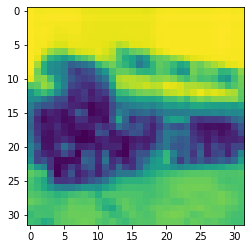

In [90]:
plt.imshow(image)

In [0]:
for i in range(len(df['X'])):
  image=df['X'][i]


In [0]:
image=df['X'][239]

In [0]:
image=np.asarray(image)
image.shape=(28,28)

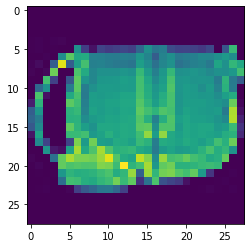

In [113]:
plt.imshow(image)

In [0]:
X_data = []

for i in range(len(df['X'])):
  
  image=df['X'][i]
  image=np.asarray(image)

  if image.shape[0]==1024:
    # image.shape=(32,32)
    image = image.reshape((32,32)).astype('float32')
    # image = cv2.resize(image, dsize=(28,28), interpolation=cv2.INTER_CUBIC)

  elif image.shape[0]==784:

    image = image.reshape((28,28)).astype('float32')

    image = cv2.resize(image, dsize=(32,32), interpolation=cv2.INTER_CUBIC)

    # image = image.reshape((28,28)).astype('float32')

    # image.shape=(28,28)

  X_data.append(image)
  

In [141]:
import keras
from keras.applications import VGG16
vgg = VGG16(weights=None,input_shape=(32,32,1))
vgg.compile(optimizer="adam",loss='categorical_crossentropy')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
trainX, testX, trainY, testY = train_test_split(X_data,df['labels'], test_size=0.2, random_state=42)

In [145]:
len(df.groupby('labels').first())

6